# Data Science Research Methods Assignment 1 (CandNo: 213873)

# Introduction

In this task we are employed as Data Scientists at SussexBudgetProductions and we are asked to provide the board with insights in order to persuade our investors to put 1.5million in the production of a new movie. The main part is analysing and presenting our approach for the strategic planning of the movie production. We are going to work with the IMDB dataset that it is given to us and make crucial recommendations about the paths we should choose for making the movie successful. 

In [2]:
myfile='movie_metadata.csv'

#standard imports for when working with pandas
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

#read data from a csv file
df = pd.read_csv(myfile,index_col=None)

# Dealing with missing values

One of the first steps in the stage of data preprocessing is handling missing values. If they are not handled properly, then there is a big possibility that our inference about the data will be inaccurate. There are two ways we can effectively 
deal with this problem, imputation and removal. In imputation we usualluy replace the missing value with the mean of the column values while in removal we drop the whole row that has the missing value. As our primary goal is to effectively deliver a report that will make the investment succesful we have focused on dealing with the missing values around the "budget" and "gross" category. By analyzing the dataset we found that "budget" and "gross" had 492 and 884 missing values from the 5043 columns. As the type of these two variables is very specific we chose to drop them all and not impute them with the mean because this would have probably added bias to our data. After the removal our new dataset has 3891 columns instead of 5043.

In [3]:
# How many values are NaN for each column out of 5043
na_values = df.isnull().sum()

# Drop missing values for budget,gross and duration category
df = df.dropna(subset=['budget','gross'])

# How many values are NaN after the adjustment
na_values = df.isnull().sum()

# Creating a new variable called 'profit'

As we said earlier the two most important variables of our dataset are "budget" and "gross". If we dedact the cost of budget from the total gross of the movie we have the total profit of the movie. So, we created the "profit" variable that is the result of the deduction that we stated before.

In [4]:
# Create a column with the return of the movie and add it to the dataframe
df['profit'] = df['gross'] - df['budget']

# Creating a subset with the variables we want to work with

Our dataset has in total 29 variables with the one we added above. Although there are many ways to analyze this dataset, we only need some of them to draw some conclusions. So we selected to work with 8 in total, "director_name", "profit", "title_year", "duration", "country", "budget", "gross", "imdb_score".

In [5]:
# Create a subset of our categories that we are going to work with
df = df[['director_name','profit','title_year','duration','country','budget','gross']]

# Currency and Inflation data 

There were two major challenges that we encountered during preprocessing. The first one was the different currencies that were used for the production of some movies as there were some very unusual values inside the "budget", "gross" and "profit" category. For example, a movie that Joon-ho Bong directed in South Korea the year 2006 had a budget of 12.2 billion according to the data. This is a clear indicator that there is more than one currencies in the categories we stated before. In order to deal with this challenge we converted all currencies to US dollars (USD). We used the yearly exchange rate of every currency with USD from 1st January of every year from 2000 to 2018. The second one was the implementation of inflation rates of every country to these three categories from 2000 to 2018. After these the data in "budget", "gross" and "profit" were normalised in respect to the value USD has in 2018 adjusted by the inflation rates of every country. 

 Unfortunately I did not have the option for this assignment to upload the .csv file with the currency exchange rates and the inflation rates, so I created a dictionary with all the values. The inflation rates were taken from http://www.in2013dollars.com/ and the currency exchange rates from https://datahub.io/core/exchange-rates#resource-yearly.

In [6]:
currency_inflation = {'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                              2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                              2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                              2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                              2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                              2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,
                              2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016],
                        'Country':['Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia','Australia',
                                   'Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada','Canada',
                                   'France','France','France','France','France','France','France','France','France','France','France','France','France','France','France','France','France',
                                   'UK','UK','UK','UK','UK','UK','UK','UK','UK','UK','UK','UK','UK','UK','UK','UK','UK',
                                   'Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany',
                                   'Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain','Spain',
                                   'USA','USA','USA','USA','USA','USA','USA','USA','USA','USA','USA','USA','USA','USA','USA','USA','USA'],
                      'Value':[1.7197,1.9346,1.8392,1.5328,1.3578,1.3111,1.3271,1.1918,1.1714,1.2615,1.087,0.9679,0.9653,1.0327,1.1069,1.3294,1.3432,
                               1.4855,1.5487,1.5704,1.4008,1.3017,1.2115,1.134,1.0734,1.066,1.1412,1.0298,0.9887,0.9995,1.03,1.1043,1.2791,1.3243,
                               1.0832,1.1171,1.0578,0.8833,0.804,0.8033,0.796,0.7293,0.6791,0.7176,0.7541,0.7178,0.7777,0.753,0.752,0.9012,0.9032,
                               0.6609,0.6945,0.6667,0.6122,0.5459,0.5509,0.5433,0.4997,0.5455,0.6411,0.6471,0.6237,0.6308,0.6395,0.6074,0.6543,0.7408,
                               1.0832,1.1171,1.0578,0.8833,0.804,0.8033,0.796,0.7293,0.6791,0.7176,0.7541,0.7178,0.7777,0.753,0.752,0.9012,0.9032,
                               1.0832,1.1171,1.0578,0.8833,0.804,0.8033,0.796,0.7293,0.6791,0.7176,0.7541,0.7178,0.7777,0.753,0.752,0.9012,0.9032,
                               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      'Inflation':[1.53,1.46,1.42,1.38,1.35,1.31,1.27,1.24,1.19,1.17,1.14,1.1,1.08,1.05,1.03,1.01,1,
                                   1.33,1.32,1.27,1.24,1.22,1.19,1.17,1.15,1.13,1.12,1.09,1.07,1.06,1.05,1.03,1.02,1,
                                   1.32,1.29,1.26,1.23,1.21,1.18,1.16,1.13,1.1,1.09,1.07,1.05,1.02,1.01,1,1,1,
                                   1.54,1.52,1.49,1.45,1.41,1.37,1.33,1.27,1.22,1.23,1.18,1.12,1.08,1.05,1.03,1.02,1,
                                   1.32,1.29,1.26,1.23,1.21,1.18,1.16,1.13,1.1,1.09,1.07,1.05,1.02,1.01,1,1,1,
                                   1.32,1.29,1.26,1.23,1.21,1.18,1.16,1.13,1.1,1.09,1.07,1.05,1.02,1.01,1,1,1,
                                   1.39,1.36,1.33,1.3,1.27,1.23,1.19,1.16,1.11,1.12,1.1,1.07,1.05,1.03,1.01,1.01,1]}

In [7]:
# Convert the dictionary into a dataframe
cur = pd.DataFrame.from_dict(currency_inflation)
cur['Year'] = cur['Year'].astype(float)

# Example with the South Korean director
# df.loc[(df['director_name'] == 'Joon-ho Bong') & (df['title_year'] == 2006)]

In [8]:
# Implement the currency exchange rates and the inflasion rates

for i,row in df.iterrows():
    if (row['country'] == 'USA') & (row['title_year']>1999):
        curren = cur[(cur["Year"] == row["title_year"]) & (cur["Country"] == row["country"])]
        
        infl_budget = row['budget'] * curren['Inflation']
        df.set_value(i,'budget',infl_budget)

        infl_gross = row['gross'] * curren['Inflation']
        df.set_value(i,'gross',infl_gross)

        infl_profit = row['profit'] * curren['Inflation']
        df.set_value(i,'profit',infl_profit)
    
    
    if (row['title_year'] > 1999) & ((row['country'] == 'UK') | (row['country'] == 'France') | (row['country'] == 'Germany') | (row['country'] == 'Canada') | (row['country'] == 'Australia') | (row['country'] == 'Spain')):
        match = cur[(cur["Year"] == row["title_year"]) & (cur["Country"] == row["country"])]

        dol_budget = row["budget"] / match["Value"].item()
        df.set_value(i,"budget",dol_budget)

        dol_gross = row['gross'] / match["Value"].item()
        df.set_value(i,'gross',dol_gross)

        dol_profit = row['profit'] / match["Value"].item()
        df.set_value(i,'profit',dol_profit)       

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please 

# Analysis of movies ''title_year''  category 

The first variable we edited was the "title_year" which corresponds to the year that a movie was produced. Below we plotted the data using a histogram in order see in which years were the most common for the production of movies.

# Histogram of distribution of ''title_year''

The histogram below depicts the frequency of the movies produced throughout the years. We can see that the distribution is left skewed as the number of movies created until 1980 is not so big. From 1980 and after it starts rising and skyrockets after the late 90s until 2016. So, we decided to make our sample smaller and include movies that were produced only after 1999 until 2016. The reason is that by making this adjustment we have created a target group that have watched movies the last 16 years and makes it easier to get some insights about them. This move narrowed down our sample by 27.06%, from 3891 rows to 2839.

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


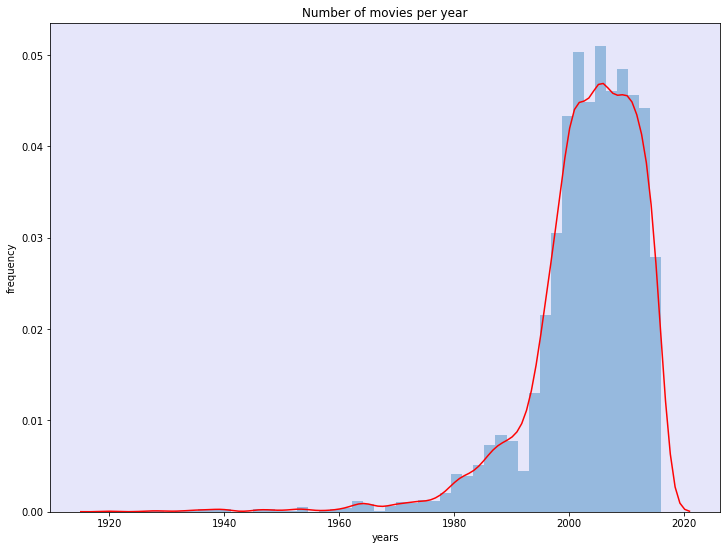

In [10]:
# Creating a histogram of the number of movies per year
plt.rcParams["figure.figsize"] = [12,9] 
sns.distplot( a=df["title_year"], hist=True, kde=True, rug=False,
             rug_kws={"color": "orange", "alpha":0.3, "linewidth": 1, "height":0.05 },
             kde_kws={"color": "red", "alpha":5, "linewidth": 1.5, "shade":False })

# Setting color in the histogram background 
plt.axes().set_facecolor("lavender")

# Adding title and axis names
plt.title('Number of movies per year')
plt.xlabel('years')
plt.ylabel('frequency')

# Show graphic
plt.show()

# Analysis of "country" production category 

The next variable that we analysed was "country" which refers to the country a movie was produced. Because there were 47 unique countries in this category we chose the first seven countries with the most movies produced and we made a subset out of them. These seven were USA, UK, France, Germany, Spain, Canada, Australia. In our new subset named "new" we also implemented the 'title_year' and 'budget' conditions and included only movies produced from 2000 and after with a budget lower than 6 million dollars. After that we created a barplot with the number of movies per country.

In [11]:
# Find the number of movies produced in every country in the starting dataset named "df"
count = df.loc[:,['director_name', 'country']].groupby('country')['director_name'].count()
df_movies_count = count.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)

# Check how many unique countries are in the "country" category
df['country'].unique()

# Create a new subset named "new" with the 7 countries with the most movies from the "df" dataset
new = df[df['country'].isin(['USA','UK','France','Germany','Canada','Australia','Spain'])]

# Set "title_year" and "budget" conditions to the "new" dataset
new = new.loc[(new['title_year'] > 1999) & (new['budget'] <= 6000000)]
# Reset index
new.reset_index()

# Find the number of movies produced in every country in the "new" dataset 
movies_per_country = new.loc[:,['director_name', 'country']].groupby('country')['director_name'].count()
new_movies_count = movies_per_country.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)
# new_movies_count
# new

# Barplot of the number of movies per country

The barplot below depicts the number of movies produced in seven countries. We can clearly see that USA has by far the most movies produced (297) with UK (23) and Canada (15) being considerably behind. Because of that, USA is a very strong candidate as the place we are going to produce our movie. After exploring the barplot we printed the mean gross, the mean profit and the mean budget of every country. Again USA had the highest mean in both categories with 10.346.790 USD and 7.939.800 USD respectively. Also the mean budget was 2.406.987 USD. All the other countries had a very small sample making their statistical findings unreliable, and that is why we selected USA as the country that we are going to produce our movie.

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


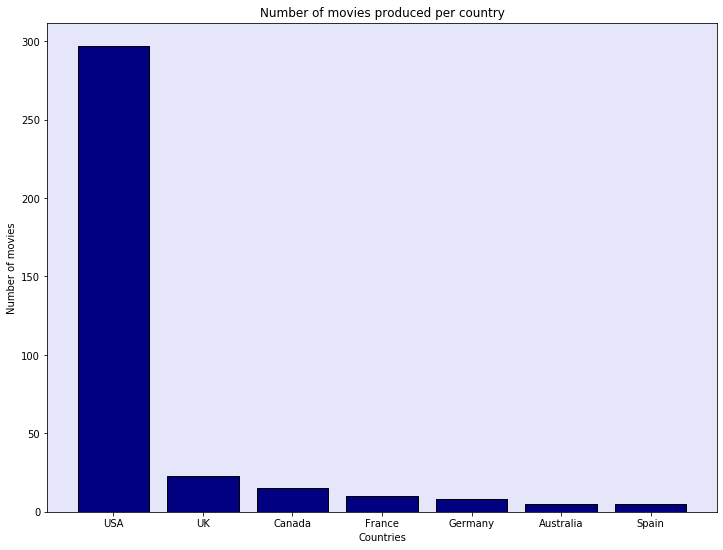

,country,number of movies
6,USA,297
5,UK,23
1,Canada,15
2,France,10
3,Germany,8
0,Australia,5
4,Spain,5


In [11]:
# Create a subset with the number of movies every country has
movies_per_country = new.loc[:,['director_name', 'country']].groupby('country')['director_name'].count()
movies_count = movies_per_country.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)

# Creating a barplot of the subset 'movies_count'
plt.bar(movies_count['country'], movies_count['No. of movies'], color = 'navy', edgecolor='black')

# Setting color in the barplot background 
plt.axes().set_facecolor("lavender")

# Add title and axis names
plt.title('Number of movies produced per country')
plt.xlabel('Countries')
plt.ylabel('Number of movies')

# Show graphic
plt.show()

# Find the number of movies produced in every country 
countries_count =new.loc[:,['country','profit']].groupby('country')['profit'].count()
countries_count = countries_count.reset_index(name='number of movies').sort_values(['number of movies'], ascending=False)
countries_count

In [13]:
# Find the mean gross of the countries
countries_mean_gross =new.loc[:,['country','gross']].groupby('country')['gross'].mean()
countries_mean_gross = countries_mean_gross.reset_index(name='average gross').sort_values(['average gross'], ascending=False)
# print(countries_mean_gross)


# Find the mean profit of the countries
countries_mean_profit =new.loc[:,['country','profit']].groupby('country')['profit'].mean()
countries_mean_profit = countries_mean_profit.reset_index(name='average profit').sort_values(['average profit'], ascending=False)
# print(countries_mean_profit)


# Find the mean budget of the countries
countries_mean_budget =new.loc[:,['country','budget']].groupby('country')['budget'].mean()
countries_mean_budget = countries_mean_budget.reset_index(name='average budget').sort_values(['average budget'], ascending=False)
# print(countries_mean_budget)

# Hypothesis Testing 1

Earlier we chose USA as our country with the highest average gross and profit. However, we needed to make sure that our mean gross is at least higher than the mean budget. So, we conducted a two-sample t-test for the gross and the budget mean in order to see if the difference between the averages is statistically significant. By statistically significant we mean the likelihood that the relationship between the "gross and "budget' variable is caused by something other than chance. Our null hypothesis was that the difference between the means of "gross" and "budget" variables is 0. Our alternative hypothesis was that the difference between the means of "gross" and "budget" variables is greater than 0. The p-value that was generated had a value of (8.67861338e-13), way smaller than 5%. As a result we rejected the null hypothesis and accepted the alternative one. With the help of the t-test we were able to confirm that if we start the production of the movie and release it in USA we will generate profit. 

In [12]:
# t-test
t_test = new[(new['country'] == 'USA')]


b_mean =t_test.loc[:,['country','budget']].groupby('country')['budget'].mean()
b_std =t_test.loc[:,['country','budget']].groupby('country')['budget'].std()
b_count =t_test.loc[:,['country','budget']].groupby('country')['budget'].count()


g_mean =t_test.loc[:,['country','gross']].groupby('country')['gross'].mean()
g_std =t_test.loc[:,['country','gross']].groupby('country')['gross'].std()
g_count =t_test.loc[:,['country','gross']].groupby('country')['gross'].count()


combinederror=(((g_std**2)/g_count)+((b_std**2)/b_count))**0.5   
z=(g_mean-b_mean)/combinederror

p_value_from_normal_for_diff = (1-stats.norm.cdf(z))
print ('one_tail gross-budget difference: ', p_value_from_normal_for_diff)

one_tail gross-budget difference:  [8.67861338e-13]


# Analysis of movies "duration" category 

Another variable that we considered is the "duration" which refers to the duration of a movie. Below we plotted a histogram to see the duration most of our movies have and a scatterplot to see how much profit these movies generated in respect to their duration. Combining the results of those two, we were able to narrow down our preferable duration for our movie to 90-120 minutes.

# Histogram of the duration of the movies 

The histogram below depicts the frequency of the duration of the movies. We can see that most movies had duration between 75 and 125 minutes. However there are also movies that their duration was either too small (40 minutes) or too big (165 minutes).

C:\Users\Markos\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


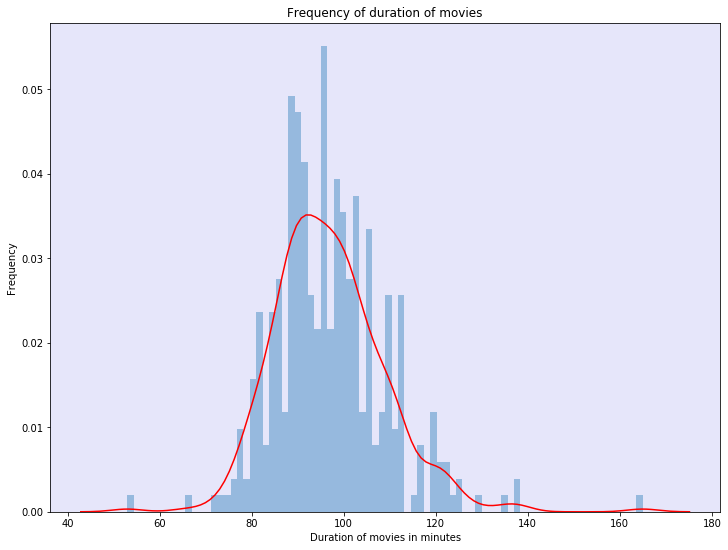

In [18]:
# Create a histogram for the duration of movies 
sns.distplot(a=new['duration'], hist=True, kde=True,rug=False, bins=80,
             rug_kws={"color": "orange", "alpha":5, "linewidth": 1, "height":0.05 },
             kde_kws={"color": "red", "alpha":1, "linewidth": 1.5, "shade":False })

# Set color in the histogram background 
plt.axes().set_facecolor("lavender")


# Add title and axis names
plt.title("Frequency of duration of movies")
plt.xlabel('Duration of movies in minutes')
plt.ylabel('Frequency')

# Show graphic
plt.show()

# Scatterplots of duration vs profit and duration vs gross

The scatterplots below shows the amount of profit and the gross generated for every movie in regard with their duration. As we know from the histogram above, most of our movies are within the 75-125 minutes gap. Many movies within this duration period generated profit or made loss. However, the movies that generated profit, made significantly more profit than the movies that made a loss. This can be seen in the left scatterplot below as there are many movies that made a huge amount of profit and can be identified as possible outliers to our dataset. The meaning behind the two plots being almost identical is that the profit some movies made was huge while their budget was very small at the same time. 

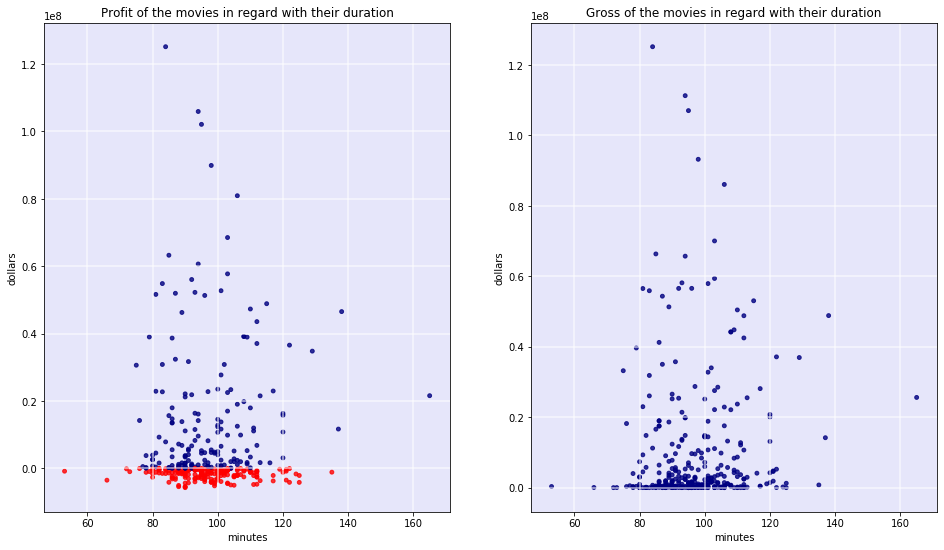

In [19]:
# Create a different color for the movies that have profit,gross>0 and profit<0
my_color_pr=np.where(new['profit']>=0, 'navy','red')
my_color_gr=np.where(new['gross']>=0, 'navy','red')

plt.rcParams["figure.figsize"] = [16,9] 
fig, ax = plt.subplots(1,2)


# Create a scatterplot using the 'duration' and 'profit' variables
ax[0].vlines(x = new['duration'], ymin=0, ymax = new['profit'], color=my_color_pr, alpha=0)
ax[0].scatter(new['duration'], new['profit'], color=my_color_pr, s=15, alpha=0.8)


#Add major gridlines and color to the scatterplot background
ax[0].grid(color='white', linestyle='-', linewidth=2, alpha=0.5) 
ax[0].set_facecolor("lavender")


# Add title and axis names 
ax[0].title.set_text("Profit of the movies in regard with their duration")
ax[0].set_xlabel('minutes')
ax[0].set_ylabel('dollars')


# Create a scatterplot using the 'duration' and 'gross' variables
ax[1].vlines(x = new['duration'], ymin=0, ymax = new['gross'], color=my_color_gr, alpha=0)
ax[1].scatter(new['duration'], new['gross'], color=my_color_gr, s=15, alpha=0.8)


#Add major gridlines and color to the scatterplot background
ax[1].grid(color='white', linestyle='-', linewidth=2, alpha=0.5) 
ax[1].set_facecolor("lavender")


# Add title and axis names 
ax[1].title.set_text("Gross of the movies in regard with their duration")
ax[1].set_xlabel('minutes')
ax[1].set_ylabel('dollars')

# Show graphic
plt.show()

# 1e8 = 1x(10^8)

After plotting the histogram and the scatterplot we started searching for our preferable duration for our movie. We focused in 3 scenarios: (80-120 minutes, 90-120 minutes 90-110 minutes). We counted how many movies each period had and how much was the mean profit generated. In the first case, 335 movies out of 363 were included with a mean profit of 6.675.160 USD dollars. In the second case, 254 movies out of 363 were included with a mean profit of 6.304.069 USD while in the third case 201 movies out of 363 were included with a mean profit of 6.678.954 USD. We selected the second case (90-120 minutes) as the first had a very broad duration span and the third had a small sample size although both of them had higher mean profit by almost 300.000 USD from the second case. Because we had many outliers at our sample the real difference between mean 'gross' and mean 'budget' for this this case (90-120 minutes) might not be the same. The gap was big as the average gross was 9.002.952 USD and the average budget 2.698.883 USD. So, we did a t-test in order to find out if this difference is statistically significant or not.

In [20]:
# Number and mean profit of movies with duration between 80 and 120 minutes
new.loc[(new['duration'] >= 80) & (new['duration'] <=120)].count() # 335 movies out of 363
first_case =new[(new['duration'] >= 80) & (new['duration'] <= 120)]['profit'].mean() # 6.675.160 USD 
  
    
# Number and mean profit of movies with duration between 90 and 120 minutes
new.loc[(new['duration'] >= 90) & (new['duration'] <= 120)].count() # 254 movies out of 363
second_case =new[(new['duration'] >= 90) & (new['duration'] <= 120)]['profit'].mean() # 6.304.069 USD 


# Number and mean profit of movies with duration between 90 and 110 minutes
new.loc[(new['duration'] > 90) & (new['duration'] <=110)].count() # 201 movies out of 363
third_case =new[(new['duration'] > 90) & (new['duration'] <= 110.0)]['profit'].mean() # 6.678.954 USD 

# print(first_case,second_case,third_case)

In [21]:
# Set the subset between 90 and 120 minutes
my_dur = new.loc[(new['duration'] >= 90) & (new['duration'] <=120)]


# Find the mean gross of the duration between 90-120 minutes
duration_mean_gross =my_dur['gross'].mean() # 9.002.952 USD


# Find the mean profit of the duration between 90-120 minutes
duration_mean_profit =my_dur['profit'].mean() # 6.304.069 USD


# Find the mean budget of the duration between 90-120 minutes
duration_mean_budget = my_dur['budget'].mean() # 2.698.883 USD

# print(duration_mean_gross,duration_mean_profit,duration_mean_budget)

# Hypothesis Testing 2

Earlier we chose the 90-120 minutes case for the duration of our movie. However, we needed to make sure that our mean gross is at least higher than the mean budget. So, we conducted a two-sample t-test for the gross and the budget mean in order to see if the difference between the two averages is statistically significant. Our null hypothesis was that the difference between the means of "gross" and "budget" variables is 0. Our alternative hypothesis was that the difference between the means of "gross" and "budget" variables is greater than 0. The p-value that was generated had a value of (0.04126928971570276), smaller than 5%. As a result we rejected the null hypothesis and accepted the alternative one. With the help of the t-test we were able to confirm that if our movie duration is between 90 and 120 minutes we will generate profit.

In [22]:
# t-test
my_dur = new.loc[(new['duration'] >= 90) & (new['duration'] <=120)]

b_mean2 =my_dur['profit'].mean()
b_std2 =my_dur['profit'].std()
b_count2 =my_dur['profit'].count()

g_mean2 =my_dur['gross'].mean()
g_std2 =my_dur['gross'].std()
g_count2 =my_dur['gross'].count()

combinederror=(((g_std2**2)/g_count2)+((b_std2**2)/b_count2))**0.5   
z=(g_mean2-b_mean2)/combinederror

p_value_from_normal_for_diff = (1-stats.norm.cdf(z))
print ('one_tail gross-budget difference: ', p_value_from_normal_for_diff)

NameError: name 'stats' is not defined

# Analysis of "director_name" category 

The last category we analysed was the "director_name" category. During this prcess we managed to gather 5 directors that fit our criteria. All had directed at least 3 movies, worked with low budget and generated a considerable amount of profit. More specifically, Jon Gunn and Alex Kendrick directed 3 movies each, with the mean budget being at 1.052.799 USD and 938.000 USD respectively, generating 3.434.673 USD and 27.787.920 USD mean profit. The other three, James Wan, Michael Tiddes, Richard Linklater	had directed three movies each one with higher budget, 2.774.667 USD, 3.871.667 USD, 3.977.250 USD and generated 69.064.380 USD, 19.596.910 USD, 8.816.508 USD respectively. Except from the first two, it is possible to approach the other three directors as the budget they have worked so far is not so high in comparison to ours. Most possible options though are Jon Gunn, Alex Kendrick and James Wan.

In [23]:
# Find the number of movies each director has produced
dir_count = new.loc[:,['director_name', 'budget']].groupby('director_name')['budget'].count()
director_count = dir_count.reset_index(name='No. of movies').sort_values(['No. of movies'], ascending=False)
# director_count.loc[director_count['director_name'].isin(directors)]

# Select the directors with 3 or more movies 
directors = ['Richard Linklater','Michael Tiddes','Jon Gunn','James Wan','Alex Kendrick']

# Find the mean budget of every director
dir_meanb = new.loc[:,['director_name', 'budget']].groupby('director_name')['budget'].mean()
dir_meanb = dir_meanb.reset_index(name='mean budget').sort_values(['mean budget'], ascending=False)
# dir_meanb.loc[dir_meanb['director_name'].isin(directors)]

# Find the mean gross of every director
dir_meang = new.loc[:,['director_name', 'gross']].groupby('director_name')['gross'].mean()
dir_meang = dir_meang.reset_index(name='mean gross').sort_values(['mean gross'], ascending=False)
# dir_meang.loc[dir_meang['director_name'].isin(directors)]

# Find the mean profit of every director
dir_meanp = new.loc[:,['director_name', 'profit']].groupby('director_name')['profit'].mean()
dir_meanp = dir_meanp.reset_index(name='mean profit').sort_values(['mean profit'], ascending=False)
# dir_meanp.loc[dir_meanp['director_name'].isin(directors)]

# Summary

In this report we examined the IMDB dataset in order to find appropriate movies that will generate profit for the SussexBudgetProductions investment. Before the analysis, we made the necessary data preprocessing dropping the missing values from the categories we were interested and converting the currency and adding inflation rate in the "budget", "gross" and "profit" variable. We created the last one as the result of the deduction gross-budget in order to help up with our analysis. Based on these three we focused our analysis in 4 specific categories included in the dataset, "title_year", "country", "duration" and "director_name". Although we had a specific budget for the movie we took a bigger sample in order to be able to draw more accurate inferences. All the other categories were dropped as we felt that we would not benefit  from them. Then we narrowed our dataset for movies that were created after 1999 to be able to catch the movie trends and because after 1999 there was a huge rise at their production. In addition to this, we found that USA is the best country for the production and release of the movie as the samples there tend to have higher gross in comparison to their budgets. The same goes for the movie duration as the choice between 90 and 120 minutes was the only one viable as the other two had either few samples or the duration span was very big. Finally, for the director role we ended up selecting the five that have produced the most movies being close to our range as they were also the most successful. Two of them are within our range and the other three are very close, meaning that they can work for us. 

# Conclusion

Based on the results of our analysis and after examining thoroughly all the categories that we have selected, we are ready to present our criteria that will lead to the production of a profitable movie and thus, to a succesful investment. Firstly, we should strongly consider USA as the country where the production and the release of the movie will take place. The average gross of the movies in USA is considerably bigger than the average budget leading to bigger profit margin and with the implementation of the t-test we have confirmed that. Secondly, the duration of the movie should be between 90 and 120 minutes as again the average gross of the movies that had duration between those values was higher than the average budget spent. Again, our analysis showed us that we will generate profit and by doing a second t-test we have confrimed it. Lastly, we have managed to gather the most talented directors that operate within our very close to our budget. Two of them, Jon Gunn and Alex Kendrick have made all their movies within our budget range and their movies were extremely succesful making a lot of money. However, the other three, James Wan, Michael Tiddes and Richard Linklater have also made some profitable movies. If we are able to persuade them to work with a little less that would be a huge achievement towards our goal and our investment, otherwise we should approach Jon Gunn and Alex Kendrick who are also great choices.